## What is RAG?
RAG is a technique that combines information retrieval with language generation, where a model retrieves relevant documents from a knowledge base and then uses them as context to generate accurate and grounded responses.

**Benefits of using RAG**

1. Use of up-to-date information  
2. Better privacy  
3. No limit of document size

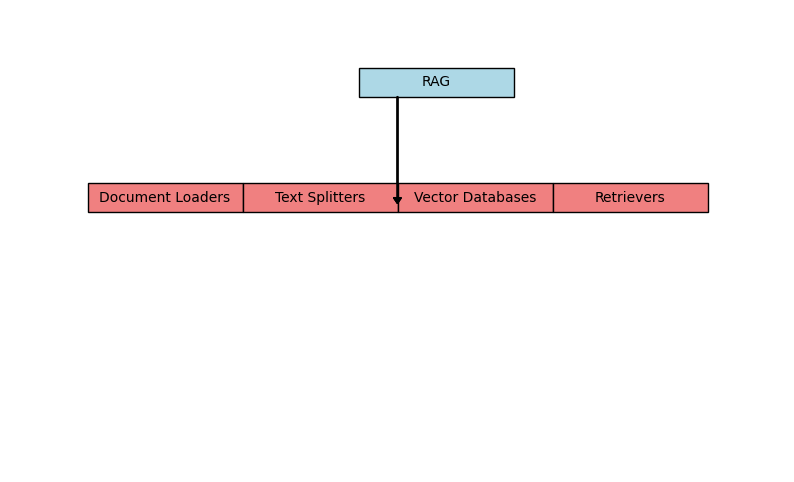

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_box(ax, text, xy, width, height, color='lightblue'):
    """Helper function to draw a box with text."""
    rect = Rectangle(xy, width, height, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width() / 2
    cy = ry + rect.get_height() / 2
    ax.text(cx, cy, text, ha='center', va='center', fontsize=10)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

# Draw the main RAG box
draw_box(ax, 'RAG', (4.5, 6.5), 2, 0.5, color='lightblue')

# Positions for the subordinate boxes
boxes = [
    ('Document Loaders', 1, 4.5),
    ('Text Splitters', 3, 4.5),
    ('Vector Databases', 5, 4.5),
    ('Retrievers', 7, 4.5)
]

# Draw subordinate boxes and connectors
for label, x, y in boxes:
    draw_box(ax, label, (x, y), 2, 0.5, color='lightcoral')
    # Draw arrow from main box to subordinate box
    ax.arrow(5, 6.5, 0, y - 6.5 + 0.25, head_width=0.1, head_length=0.1, fc='black', ec='black')

plt.show()

# [Document Loaders in LangChain](https://python.langchain.com/docs/integrations/document_loaders/#pdfs)
Document loaders are components in LangChain used to load data from various sources into a standardized format (usually as Document objects), which can then be used for chunking, embedding, retrieval, and generation.
```python

document = {
    "page_content": "The actual text content",
    "metadata": {"source": "filename.pdf"}
}
```
### What are Document Loaders?

**Document Loaders** in LangChain are utility classes that help you ingest and transform data from various sources (files, databases, APIs, web pages, etc.) into a standard format—typically as `Document` objects. This is the first step in any LLM pipeline that involves external data, such as retrieval-augmented generation (RAG), semantic search, or chatbot applications.

### Key Features

- **Wide Source Support:** Load from PDFs, Word docs, CSVs, web pages, Notion, Slack, databases, and many more.
- **Integrated Parsing:** Many loaders support parsing and metadata extraction (title, URL, page number, etc.).
- **Standardized Output:** All loaders produce a list of `Document` objects, each containing `.page_content` (the text) and `.metadata` (contextual information).
- **Composable:** Can be combined with text splitters, retrievers, and vector stores for downstream tasks.

### Why Use Document Loaders?

- **Ease of Ingestion:** Quickly integrate data from diverse sources into your LLM pipeline.
- **Preprocessing:** Many loaders handle cleaning, parsing, and converting to text automatically.
- **Extensibility:** You can write custom loaders for proprietary formats or APIs.

### Example: Loading a PDF

```python
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("example.pdf")
documents = loader.load()
print(documents[0].page_content)
print(documents[0].metadata)
```

### Example: Loading a Web Page

```python
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://python.langchain.com/docs")
documents = loader.load()
```

### Example: Loading a Directory of Text Files

```python
from langchain_community.document_loaders import DirectoryLoader, TextLoader

loader = DirectoryLoader(
    path="path/to/texts", 
    glob="*.txt",
    loader_cls=TextLoader
)
documents = loader.load()
```

### List of Common Document Loaders

- **File-based:** `TextLoader`, `PyPDFLoader`, `UnstructuredFileLoader`, `CSVLoader`, `JSONLoader`, `Docx2txtLoader`
- **Web/API:** `WebBaseLoader`, `SitemapLoader`, `NotionDBLoader`, `SlackLoader`
- **Databases:** `SQLDatabaseLoader`, `MongoDBLoader`
- **Cloud Storage:** `S3FileLoader`, `GCSFileLoader`, `AzureBlobStorageLoader`
- **Others:** `EverNoteLoader`, `ConfluenceLoader`, `GoogleDriveLoader`, and more

> For a full list, see the [LangChain documentation](https://python.langchain.com/docs/modules/data_connection/document_loaders/).

### Custom Document Loaders

You can build your own loader by subclassing `BaseLoader` and implementing the `load()` method to return a list of `Document` objects.

```python
from langchain_core.documents import Document
from langchain_community.document_loaders import BaseLoader

class MyAPILoader(BaseLoader):
    def load(self):
        # Fetch data from API
        data = fetch_my_api()
        return [Document(page_content=item["content"], metadata=item["metadata"]) for item in data]
```
### Next Steps

- **Combine with Text Splitters:** Use a splitter (e.g., `RecursiveCharacterTextSplitter`) to chunk large documents for vector storage or retrieval.
- **Index with Vector Stores:** After loading and splitting, use a vector store (e.g., FAISS, Chroma) for semantic search or retrieval.
- **Integrate with Chains:** Loaded documents can be passed to retrievers, QA chains, chatbots, etc.
### References

- [LangChain Document Loaders Documentation](https://python.langchain.com/docs/concepts/document_loaders/)

**Summary:**  
Document Loaders are the essential entry point for getting external data into your LangChain LLM pipelines, supporting a huge range of sources and formats with a unified interface.

# TextLoader

**TextLoader** is a [simple and commonly used document loader](https://example.com) in LangChain that reads plain text (.txt) files and converts them into LangChain Document objects.

#### Use Case

- Ideal for loading chat logs, scraped text, transcripts, code snippets, or any plain text data into a LangChain pipeline:

### Limitation

- Works only with .txt files

### What is TextLoader?

**TextLoader** is a simple Document Loader in LangChain designed to read plain text files (`.txt`) and convert them into standardized `Document` objects. This loader is commonly used as the starting point for ingesting and processing unstructured text data in LLM pipelines, such as retrieval-augmented generation (RAG), summarization, or chatbots.

### Key Features

- **Reads Plain Text Files:** Easily loads the full content of `.txt` files.
- **Returns Standard Document Objects:** Outputs a list of `Document` objects, each with `.page_content` (the text) and `.metadata`.
- **Supports Metadata:** Includes file path and optionally other metadata.
- **Composable:** Can be used with text splitters and other loaders.

### Basic Usage

```python
from langchain_community.document_loaders import TextLoader

loader = TextLoader("path/to/your/file.txt")
documents = loader.load()
print(documents[0].page_content)  # The text content
print(documents[0].metadata)      # Metadata: file path, etc.
```

### Usage with DirectoryLoader

You can use `TextLoader` with `DirectoryLoader` to load all `.txt` files in a directory:

```python
from langchain_community.document_loaders import DirectoryLoader, TextLoader

loader = DirectoryLoader(
    path="path/to/texts",
    glob="*.txt",
    loader_cls=TextLoader
)
documents = loader.load()
```

### Example Output

Each loaded file gives a `Document` object:
```python
# Example
doc = documents[0]
print(doc.page_content)  # "This is the content of your text file..."
print(doc.metadata)      # {'source': 'path/to/your/file.txt'}
```

### When to Use TextLoader

- When you want to ingest plain text files into LangChain.
- For fast prototyping with unstructured text data.
- As a starting point for pipelines involving chunking, vectorization, or retrieval.


### References

- [LangChain Document Loaders Docs](https://python.langchain.com/docs/introduction/)
- [TextLoader Source Code (GitHub)](https://github.com/langchain-ai/langchain)

**Summary:**  
`TextLoader` is the go-to loader for ingesting plain text files into LangChain, providing a simple and effective way to process unstructured text data in LLM workflows.

# PyPDFLoader

**PyPDFLoader** is a [document loader](https://example.com) in LangChain used to load content from PDF files and convert each page into a Document object.

### Example

```python  
[  
    Document(page_content="Text from page 1", metadata={"page": 0, "source": "file.pdf"}),  
    Document(page_content="Text from page 2", metadata={"page": 1, "source": "file.pdf"}),  
    ...  
]  
```
### Limitations
- It uses the `PyPDF` library under the hood — not great with scanned PDFs or complex layouts!

| Use Case                   | Recommended Loader                                               |
|----------------------------|------------------------------------------------------------------|
| Simple, clean PDFs       | PyPDFLoader                                                     |
| PDFs with tables/columns | PDFPlumberLoader                                                |
| Scanned/image PDFs       | UnstructuredPDFLoader or AmazonTextractPDFLoader               |
| Need layout and image data | PyMuPDFLoader                                                  |
| Want best structure extraction | UnstructuredPDFLoader                                    |

### What is PyPDFLoader?

**PyPDFLoader** is a document loader in LangChain that allows you to ingest PDF files using the [PyPDF2](https://pypdf2.readthedocs.io/) library. It extracts text content from each page of a PDF and returns them as a list of `Document` objects, each containing the text for a single page and relevant metadata (such as page number and source file).

### Key Features

- **Page-by-Page Extraction:** Loads each page of a PDF as a separate `Document`.
- **Metadata Support:** Automatically attaches metadata like `page` and `source` (file path).
- **Handles Most PDFs:** Works with most text-based PDFs, including multi-page documents.
- **Composable:** Can be used with text splitters, retrievers, and vector stores for further processing.

### Basic Usage

```python
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("example.pdf")
documents = loader.load()

print(documents[0].page_content)  # Text of the first page
print(documents[0].metadata)      # {'source': 'example.pdf', 'page': 0}
```

- Each `Document` represents one page.
- The metadata includes the file path (`source`) and the page number (`page`, zero-indexed).

### Usage with Text Splitters

To further process large pages, you can combine PyPDFLoader with a text splitter:

```python
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = PyPDFLoader("example.pdf")
documents = loader.load()

splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = splitter.split_documents(documents)
```

### When to Use PyPDFLoader

- When you want to ingest or analyze the contents of PDF files with LangChain.
- For retrieval-augmented generation (RAG), semantic search, or document Q&A over PDFs.
- When you require page-level granularity or metadata in your workflows.

### References

- [LangChain PyPDFLoader Documentation](https://python.langchain.com/docs/modules/data_connection/document_loaders/how_to/pdf)
- [PyPDF2 Documentation](https://pypdf2.readthedocs.io/)
- [LangChain Data Connection Guide](https://python.langchain.com/docs/modules/data_connection/document_loaders/)

**Summary:**  
`PyPDFLoader` is the go-to loader for extracting and structuring text from PDF files into LangChain pipelines, supporting robust page-level processing and metadata extraction.

# DirectoryLoader

**DirectoryLoader** is a [document loader](https://python.langchain.com/docs/integrations/document_loaders/#pdfs) that lets you load multiple documents from a directory (folder) of files.

| Glob Pattern            | What It Loads                                 |
|-------------------------|----------------------------------------------|
| `*.txt`                | All `.txt` files in all subfolders          |
| `--*.pdf`              | All `.pdf` files in the root directory       |
| `data/*.csv`           | All `.csv` files in the `data/` folder       |
| `**/*`                 | All files (any type, all folders)           |

*Note: `**` = recursive search through subfolders*

### What is DirectoryLoader?

**DirectoryLoader** is a utility class in LangChain that enables you to load and process multiple documents from a directory (folder) on your filesystem. It recursively scans a directory, matches files by pattern (e.g., `*.txt`, `*.pdf`), and uses a specified loader (such as `TextLoader`, `PyPDFLoader`, etc.) to convert each file into standard `Document` objects for downstream processing.

### Key Features

- **Bulk Loading:** Ingests all files in a directory based on a glob pattern (e.g., `*.txt`).
- **Recursive:** Can optionally search subdirectories.
- **Flexible Loader:** Allows you to specify which loader to use for each file type.
- **Standardized Output:** Returns a list of `Document` objects (with `.page_content` and `.metadata`).


### Basic Usage

```python
from langchain_community.document_loaders import DirectoryLoader, TextLoader

loader = DirectoryLoader(
    path="path/to/directory",
    glob="*.txt",                # Only load .txt files
    loader_cls=TextLoader,       # Use TextLoader for each file
    recursive=True               # (Optional) Search subdirectories
)
documents = loader.load()

print(documents[0].page_content)  # Text of the first document
print(documents[0].metadata)      # Metadata: source path, etc.
```

### Loading Multiple File Types

You can provide a custom function to select different loaders based on file extension:

```python
from langchain_community.document_loaders import DirectoryLoader, TextLoader, PyPDFLoader

def loader_fn(file_path):
    if file_path.endswith(".txt"):
        return TextLoader(file_path)
    elif file_path.endswith(".pdf"):
        return PyPDFLoader(file_path)
    else:
        return None

loader = DirectoryLoader(
    path="path/to/directory",
    glob="*.*",                   # Load all files
    loader_fn=loader_fn
)
documents = loader.load()
```

### When to Use DirectoryLoader

- When you want to load a large number of files from a folder for LLM pipelines, retrieval, or semantic search.
- For batch ingesting documents of the same or mixed types.
- As a first step before text splitting, embedding, or indexing.

### References

- [LangChain DirectoryLoader Docs](https://python.langchain.com/docs/modules/data_connection/document_loaders/how_to/directory)
- [DirectoryLoader Source Code (GitHub)](https://github.com/langchain-ai/langchain/blob/master/libs/community/langchain_community/document_loaders/directory.py)


**Summary:**  
`DirectoryLoader` is the go-to utility for bulk loading and processing documents from directories in LangChain, supporting flexible file patterns, recursion, and custom loaders for different file types.

# Load vs Lazy load

| **load()** | **lazy_load()** |
|--------------|------------------|
| Eager Loading (loads everything at once). | Lazy Loading (loads on demand). |
| Returns: A list of *Document* objects. | Returns: A *generator* of *Document* objects. |
| Loads all documents immediately into memory. | Documents are not all loaded at once; they're fetched one at a time as needed. |
| Best when: | Best when: |
| - The number of documents is small. | - You're dealing with large documents or lots of files. |
| - You want everything loaded upfront. | - You want to *stream* processing (e.g., chunking, embedding) without using lots of memory. |

# WebBaseLoader

**WebBaseLoader** is a [document loader](https://example.com) in LangChain used to load and extract text content from [web pages (URLs)](https://example.com).

It uses [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) under the hood to parse HTML and extract visible text.

### When to Use:

- For blogs, news articles, or public websites where the content is primarily text-based and static.

### Limitations:

- Doesn’t handle JavaScript-heavy pages well (use SleniumURLLoader for that).
- Loads only static content (what’s in the HTML, not what loads after the page renders).

### What is WebBaseLoader?

**WebBaseLoader** is a document loader in LangChain designed to extract and ingest content from web pages (i.e., URLs) into your LLM pipelines. It fetches the HTML content of a web page, parses it (usually extracting the visible text), and returns it as one or more standardized `Document` objects. This is especially useful for retrieval-augmented generation (RAG), search, or any application that needs to use information from the web.

### Key Features

- **URL-Based Loading:** Loads content directly from one or more URLs.
- **Text Extraction:** Strips out boilerplate HTML, scripts, and styles, extracting the main textual content.
- **Metadata Support:** Adds useful metadata (such as the source URL) to each document.
- **Composable:** Works with text splitters, retrievers, and other LangChain tools.
- **Customizable Extraction:** (Advanced) You can override methods for custom parsing or extraction logic.

### Basic Usage

```python
from langchain_community.document_loaders import WebBaseLoader

# Load a single web page
loader = WebBaseLoader("https://python.langchain.com/docs")
documents = loader.load()

print(documents[0].page_content)  # Extracted main text
print(documents[0].metadata)      # {'source': 'https://python.langchain.com/docs'}
```

- `documents` will be a list of `Document` objects, typically one per web page.

### Loading Multiple URLs

You can provide a list of URLs to load in one go:

```python
urls = [
    "https://python.langchain.com/docs",
    "https://www.example.com"
]
loader = WebBaseLoader(urls)
documents = loader.load()
```

### When to Use WebBaseLoader

- To ingest knowledge from web pages into LLM or RAG pipelines.
- For scraping and querying web documentation, blogs, news, etc.
- As a pre-processing step before chunking, embedding, or indexing web data for search or Q&A.

**Summary:**  
`WebBaseLoader` is the standard LangChain loader for extracting and standardizing web page content for use in LLM-powered workflows—making web data easily available for retrieval, analysis, or augmentation.

# CSVLoader

**CSVLoader** is a [document loader](https://example.com) used to load CSV files into LangChain Document objects — one per row, by default.

### What is CSVLoader?

**CSVLoader** is a document loader in LangChain designed to ingest data from CSV (Comma-Separated Values) files. It reads the rows from a CSV file and converts them into standardized `Document` objects, making the data ready for use in LLM pipelines for tasks such as retrieval-augmented generation (RAG), search, question answering, and more.

### Key Features

- **Reads CSV Files:** Loads each row of a CSV as a separate `Document`.
- **Customizable Columns:** Lets you specify which columns to use for content and which for metadata.
- **Flexible Parsing:** Supports different delimiters and CSV dialects.
- **Standardized Output:** Returns a list of `Document` objects with `.page_content` and `.metadata`.

### Basic Usage

```python
from langchain_community.document_loaders import CSVLoader

# Basic usage: loads all rows, content is entire row as string
loader = CSVLoader(file_path="example.csv")
documents = loader.load()

print(documents[0].page_content)  # String of CSV row
print(documents[0].metadata)      # Metadata: row index, source file, etc.
```

### Specifying Content and Metadata Columns

You can specify a column to use as the main text content and others as metadata:

```python
loader = CSVLoader(
    file_path="example.csv",
    source_column="text",            # Column to use for page_content
    metadata_columns=["author", "id"] # Columns to add as metadata
)
documents = loader.load()

print(documents[0].page_content)  # Content from 'text' column
print(documents[0].metadata)      # {'author': ..., 'id': ..., 'source': 'example.csv', ...}
```

### Advanced Usage: Custom Delimiter

```python
loader = CSVLoader(
    file_path="example.tsv",
    delimiter="\t"   # For TSV files
)
documents = loader.load()
```

### When to Use CSVLoader

- When you want to ingest tabular data, such as datasets, logs, or exported records, into an LLM pipeline.
- For question answering or search over structured CSV data.
- As a preprocessing step before chunking, embedding, or indexing.

**Summary:**  
`CSVLoader` is the standard way to bring structured CSV data into LangChain, enabling powerful LLM and retrieval workflows over tabular datasets.